## 1. Exploratory Data Analysis (EDA) — Inspect, Visualize, and Clean the Data

### 1.1. Data Import and Basic Inspection

First, import the necessary libraries and load the dataset.

In [1]:
import pandas as pd

# Load the datasets
train_data = pd.read_csv('../data/BBC News Train.csv')
test_data = pd.read_csv('../data/BBC News Test.csv')

# Basic inspection of the data
print(train_data.head())
print(train_data.info())
print(test_data.head())
print(test_data.info())

   ArticleId                                               Text  Category
0       1833  worldcom ex-boss launches defence lawyers defe...  business
1        154  german business confidence slides german busin...  business
2       1101  bbc poll indicates economic gloom citizens in ...  business
3       1976  lifestyle  governs mobile choice  faster  bett...      tech
4        917  enron bosses in $168m payout eighteen former e...  business
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB
None
   ArticleId                                               Text
0       1018  qpr keeper day heads for preston queens park r...
1       1319  software watching while you work software that...
2      

### 1.2. Inspect Null Values

Check if there are any null values in the dataset.

In [2]:
# Check for null values in the training set
print(train_data.isnull().sum())

# Check for null values in the test set
print(test_data.isnull().sum())

ArticleId    0
Text         0
Category     0
dtype: int64
ArticleId    0
Text         0
dtype: int64


### 1.3. Assign the Categories with Numbers

Assign numerical labels to the categories for easier processing.

In [3]:
# Assign numerical labels to categories in the training set
train_data['CategoryID'] = train_data['Category'].factorize()[0]

# Display the updated dataset
print(train_data.head())

   ArticleId                                               Text  Category  \
0       1833  worldcom ex-boss launches defence lawyers defe...  business   
1        154  german business confidence slides german busin...  business   
2       1101  bbc poll indicates economic gloom citizens in ...  business   
3       1976  lifestyle  governs mobile choice  faster  bett...      tech   
4        917  enron bosses in $168m payout eighteen former e...  business   

   CategoryID  
0           0  
1           0  
2           0  
3           1  
4           0  



### 1.4. Clean Data

Perform data cleaning tasks such as removing punctuations, numbers, extra spaces, and applying lemmatization.

In [ ]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))


# Define a function to clean the text data
def clean_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize the text
    words = nltk.word_tokenize(text)
    # Remove stopwords and numbers, and apply lemmatization
    words = [lemmatizer.lemmatize(word.lower()) for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(words)

# Apply the cleaning function to the text data
train_data['CleanedText'] = train_data['Text'].apply(clean_text)
test_data['CleanedText'] = test_data['Text'].apply(clean_text)

# Display the cleaned text
print(train_data['CleanedText'].head())

### 1.5. Plan for Feature Extraction

Use TF-IDF to convert the cleaned text data into numerical features.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Transform the cleaned text data
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['CleanedText'])
X_test_tfidf = tfidf_vectorizer.transform(test_data['CleanedText'])

# Display the shape of the resulting matrices
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

(1490, 5000)
(735, 5000)


## 2. Building and Training Models


### 2.1. Train with Unsupervised Learning

Apply K-Means clustering as an unsupervised learning technique.

In [ ]:
from sklearn.cluster import KMeans

# Apply K-Means clustering
kmeans_model = KMeans(n_clusters=5, random_state=42)
kmeans_model.fit(X_train_tfidf)

# Predict clusters
train_clusters = kmeans_model.predict(X_train_tfidf)
print(train_clusters)

[2 2 2 ... 2 3 3]


### 2.2. Tuning Hyperparameters

Search for the optimal number of clusters by evaluating cluster quality.

In [ ]:
from sklearn.metrics import silhouette_score

# Evaluate the silhouette score for different numbers of clusters
for n_clusters in range(2, 11):
    kmeans_model = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_model.fit(X_train_tfidf)
    silhouette_avg = silhouette_score(X_train_tfidf, kmeans_model.labels_)
    print(f"For n_clusters = {n_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters = 2, the silhouette score is 0.010794425527664082
For n_clusters = 3, the silhouette score is 0.011132260711896545
For n_clusters = 4, the silhouette score is 0.013941165180589974
For n_clusters = 5, the silhouette score is 0.017519291187052255
For n_clusters = 6, the silhouette score is 0.016747537465265916
For n_clusters = 7, the silhouette score is 0.016457794125104303
For n_clusters = 8, the silhouette score is 0.0175132881768049
For n_clusters = 9, the silhouette score is 0.018146497946142398
For n_clusters = 10, the silhouette score is 0.018414819902694498


## 3. Compare with Supervised Learning


### 3.1. Supervised Learning

Use Logistic Regression as a supervised learning technique.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_tfidf, train_data['CategoryID'])

# Predict on the training data
train_pred = log_reg.predict(X_train_tfidf)

# Evaluate the performance
print("Logistic Regression accuracy:", accuracy_score(train_data['CategoryID'], train_pred))

Logistic Regression accuracy: 0.9959731543624161


### 3.3. Compare with Other Models

Compare Logistic Regression with other models such as Random Forest, SVM, etc.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Train and evaluate other models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

for model_name, model in models.items():
    model.fit(X_train_tfidf, train_data['CategoryID'])
    predictions = model.predict(X_train_tfidf)
    print(f"{model_name} accuracy:", accuracy_score(train_data['CategoryID'], predictions))

Random Forest accuracy: 1.0
SVM accuracy: 1.0


## 4. Prediction

Use the trained models to predict the categories for the test data.


In [ ]:
# Predict categories for the test data using the best model (e.g., Logistic Regression)
test_predictions = log_reg.predict(X_test_tfidf)

# Add predictions to the test dataframe
test_data['Category'] = test_predictions

# Map the numeric predictions back to the original categories
category_mapping = dict(enumerate(train_data['Category'].unique()))
test_data['Category'] = test_data['Category'].map(category_mapping)

# Display the final test data with predictions
print(test_data[['Text', 'Category']])

test_data.drop(['CleanedText', 'Text'], axis = 1).to_csv('submission.csv', index = False)


                                                  Text       Category
0    qpr keeper day heads for preston queens park r...          sport
1    software watching while you work software that...           tech
2    d arcy injury adds to ireland woe gordon d arc...          sport
3    india s reliance family feud heats up the ongo...       business
4    boro suffer morrison injury blow middlesbrough...          sport
..                                                 ...            ...
730  eu to probe alitalia  state aid  the european ...       business
731  u2 to play at grammy awards show irish rock ba...  entertainment
732  sport betting rules in spotlight a group of mp...       politics
733  alfa romeos  to get gm engines  fiat is to sto...       business
734  citizenship event for 18s touted citizenship c...       politics

[735 rows x 2 columns]


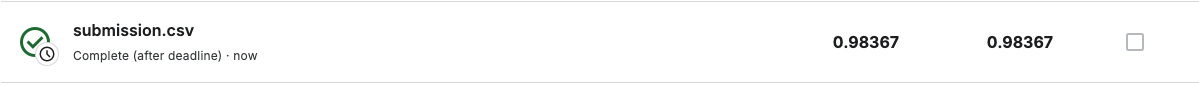

In [ ]:
from IPython.display import Image
Image(filename='Untitled.png') 